# Artificial Neural Network
## Regression

In [52]:
#importing libraries 
import numpy as np
import pandas as pd 

In [56]:
df = pd.read_csv('/content/BostonHousing.csv')

In [57]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [58]:
BHNames = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']

In [59]:
from pandas.core.tools.datetimes import Scalar
#to scale data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
print(scale.fit(df))

scaledData = scale.fit_transform(df)
scaledData = pd.DataFrame(scaledData,columns=BHNames)

summary = scaledData.describe()
summary = summary.transpose()
print(summary)

MinMaxScaler()
         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
b        506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    5

<function matplotlib.pyplot.show>

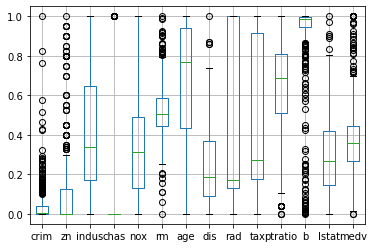

In [60]:
#visualizing data
import matplotlib.pyplot as plt
boxplot = scaledData.boxplot(column=BHNames)
plt.show

In [61]:
corrdata = scaledData.corr(method='pearson')
with pd.option_context('display.max_rows',None,'display.max_columns',corrdata.shape[1]):
  print(corrdata)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

In [62]:
#spliting data into training and testing
from sklearn.model_selection import train_test_split

x = scaledData.drop('medv',axis=1)
y = scaledData['medv']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('x_test',y_test.shape)

x_train (404, 13)
x_test (102, 13)
y_train (404,)
x_test (102,)


In [66]:
#import model platform 
import keras
from keras.engine.sequential import Sequential
from keras.layers import Dense,Flatten

In [68]:
#training model
classifier = Sequential()

#adding first hidden layer and input
classifier.add(Dense(16,activation='relu',input_dim=13))

#adding second hidden layer
classifier.add(Dense(16,activation='relu'))

#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

#compiling 
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [70]:
#fitting model
classifier.fit(x=x_train,y=y_train,batch_size=120,epochs=20,validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 0s 99ms/step - loss: 0.0073 - accuracy: 0.0372 - val_loss: 0.0057 - val_accuracy: 0.0370
Epoch 2/20
3/3 [==============================] - 0s 18ms/step - loss: 0.0073 - accuracy: 0.0372 - val_loss: 0.0057 - val_accuracy: 0.0370
Epoch 3/20
3/3 [==============================] - 0s 14ms/step - loss: 0.0072 - accuracy: 0.0372 - val_loss: 0.0057 - val_accuracy: 0.0370
Epoch 4/20
3/3 [==============================] - 0s 16ms/step - loss: 0.0072 - accuracy: 0.0372 - val_loss: 0.0057 - val_accuracy: 0.0370
Epoch 5/20
3/3 [==============================] - 0s 16ms/step - loss: 0.0072 - accuracy: 0.0372 - val_loss: 0.0056 - val_accuracy: 0.0370
Epoch 6/20
3/3 [==============================] - 0s 18ms/step - loss: 0.0071 - accuracy: 0.0372 - val_loss: 0.0055 - val_accuracy: 0.0370
Epoch 7/20
3/3 [==============================] - 0s 16ms/step - loss: 0.0071 - accuracy: 0.0372 - val_loss: 0.0055 - val_accuracy: 0.0370
Epoch 8/20
3/3 [===========

In [72]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [73]:
#prediction
y_pred = classifier.predict(x_test)

In [75]:
#score
classifier.evaluate(x_test,y_test,verbose=1)

4/4 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.0294


[0.007525102235376835, 0.029411764815449715]